In [1]:
import pandas as pd
from utilities import clean_data

In [2]:
df, df_brands, df_allbrands, brands, compsets, compset_groups, groups_bycompset = clean_data()

In [3]:
#Get a Dataframe where one date corresponds to one number of the total followers across all companies
#this will be our reference for normalization
df_allbrands_total = df_allbrands.copy()
df_allbrands_total = df_allbrands_total[df_allbrands_total['compset'] == 'Study (All Brands)']

In [4]:
#create a new dataframe to make space for the normalized data
df_normalized = df.copy()
# Convert the 'period_end_date' column to datetime objects
df_normalized['period_end_date'] = pd.to_datetime(df_normalized['period_end_date'])

#Normalization
#e.g. divide the number of followers for a company by the sum of all followers of all companies
for date in df_allbrands['period_end_date'].unique():
    # Get the indices where the 'period_end_date' matches the current date
    indices = df_normalized['period_end_date'] == date
    
    # Normalize each column in df_normalized by the corresponding value in df_allbrands_total
    df_normalized.loc[indices, 'followers'] /= df_allbrands_total.loc[df_allbrands_total['period_end_date'] == date, 'followers'].values[0]
    df_normalized.loc[indices, 'pictures']  /= df_allbrands_total.loc[df_allbrands_total['period_end_date'] == date, 'pictures'].values[0]
    df_normalized.loc[indices, 'videos']    /= df_allbrands_total.loc[df_allbrands_total['period_end_date'] == date, 'videos'].values[0]
    df_normalized.loc[indices, 'comments']  /= df_allbrands_total.loc[df_allbrands_total['period_end_date'] == date, 'comments'].values[0]
    df_normalized.loc[indices, 'likes']     /= df_allbrands_total.loc[df_allbrands_total['period_end_date'] == date, 'likes'].values[0]

In [5]:
df_copy = df.copy()
# Convert the 'period_end_date' column to datetime objects
df_copy['period_end_date'] = pd.to_datetime(df_copy['period_end_date'])

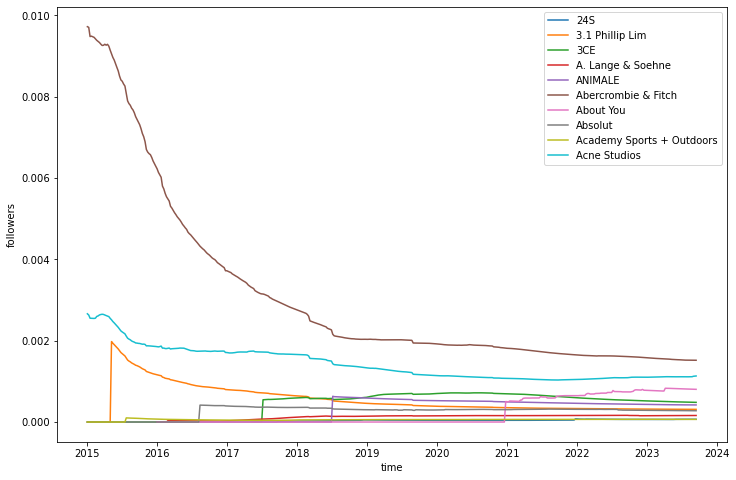

In [6]:
import matplotlib.pyplot as plt

#illustrating some of the normalized data
#notice how the y-axis is significantly scaled and shows the relative contribution to the total number of followers of each company
plt.figure(figsize=(12,8))
for company in df_normalized['business_entity_doing_business_as_name'].unique()[:10]:
    plt.plot(df_normalized[df_normalized['business_entity_doing_business_as_name'] == company]['period_end_date'],
         df_normalized[df_normalized['business_entity_doing_business_as_name'] == company]['followers'], label=company)
plt.xlabel('time')
plt.ylabel('followers')
plt.legend()
plt.show()
